
# Nombre: Arturo Lazcano
##RUT: 20.470.051.6

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import dirichlet,beta,norm,uniform,chi2,bernoulli, poisson, binom, expon, truncexpon, gamma

In [184]:
# Parámetros para gráficos
plt.style.use('seaborn-darkgrid')
plt.rc('axes', titlesize=25)
plt.rc('legend', fontsize=18)  
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.titlesize'] = 25
plt.rcParams["figure.figsize"] = (15,6)
#función auxiliar para calcular la suma de los x_i
def aux(X,i):
  aux=0
  for k in range(0,i+1):
    aux+=X[k]
  return aux

def CDC(X,C):
  n=len(X)
  suma=0
  for i in range(0,n):
    if X[i]!=C[i]:
      suma+=1
  return suma

def SumaNoCensurados(X,c):
  suma=0
  for i in range(0,len(X)):
    if X[i]!=c:
      suma+=X[i]
  return suma


#P2

In [185]:
Lambda=2 # Valor lambda
n=1000 # Cantidad de muestras aleatorias
c=5 # Censura
X = expon.rvs(loc = 0, scale = Lambda, size=n)
Z = truncexpon.rvs(c, loc = 0, scale = Lambda, size=n)
DCensurada=np.minimum(X,c)
alpha=30
beta=3
x=np.linspace(0,4, num=1000) 
#Cálculo distribución posterior 
alphapost=(n-CDC(X,DCensurada))+alpha
betapost= c*CDC(X,DCensurada) + beta + SumaNoCensurados(DCensurada,c)
Ga=gamma.pdf(x,loc=0,a=betapost,scale=(1/alphapost))

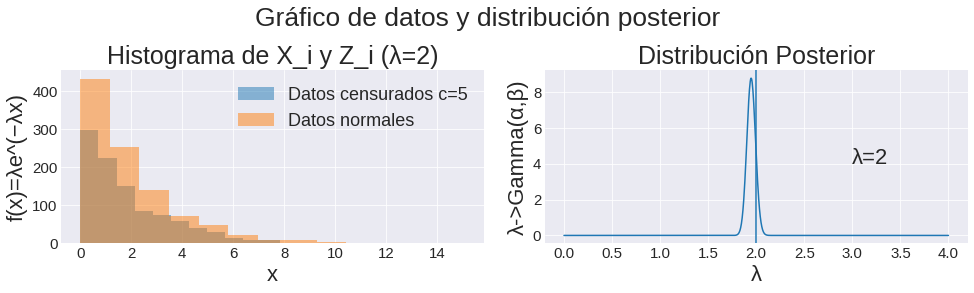

In [186]:
#Creación de histograma y gráfico de distribución
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.hist(Z, bins=13, alpha=0.5, label="Datos censurados c=5")
plt.hist(X, bins=13, alpha=0.5, label="Datos normales")
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)=λe^(−λx)')
plt.title(r'Histograma de X_i y Z_i (λ=2)')
plt.subplot(1, 2, 2)
plt.plot(x,Ga)
plt.axvline(x=Lambda) 
plt.text(3, 4, 'λ=2')
plt.xlabel('λ')
plt.ylabel('λ->Gamma(α,β)')
plt.title(r'Distribución Posterior')
plt.suptitle('Gráfico de datos y distribución posterior', y=1.05)
plt.tight_layout()

#Mismo gráfico que antes pero modificando la cantidad de datos $n=1000$ a $n=1500$ y la censura $c=5$ a $c=7$

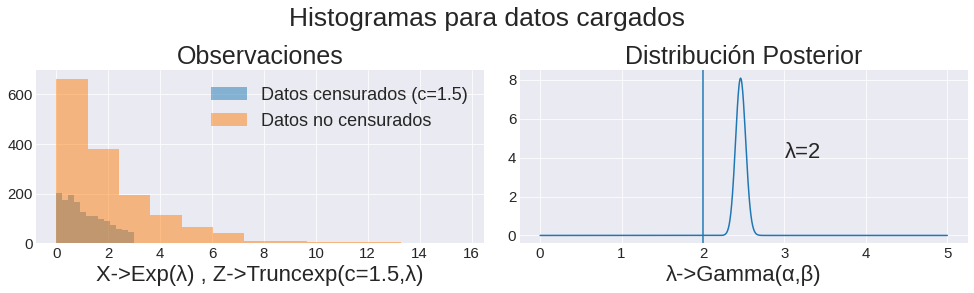

In [187]:
Lambda=2
n=1500 # Nueva cantidad de datos
c=1.5 # Censura
X = expon.rvs(loc = 0, scale = Lambda, size=n)
DCensurada=np.minimum(X,c)
Z = truncexpon.rvs(c, loc = 0, scale = Lambda, size=n)
alpha=30
beta=3
alphapost=(n-CDC(X,DCensurada))+alpha
betapost= c*CDC(X,DCensurada) + beta + SumaNoCensurados(DCensurada,c)
Ga=gamma.pdf(x,loc=0,a=betapost,scale=(1/alphapost))
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.hist(Z, bins=13, alpha=0.5, label="Datos censurados (c=1.5)")
plt.hist(X, bins=13, alpha=0.5, label="Datos no censurados")
plt.legend()
plt.xlabel('X->Exp(λ) , Z->Truncexp(c=1.5,λ)')
plt.title(r'Observaciones')
plt.subplot(1, 2, 2)
x=np.linspace(0,5, num=1000)
plt.plot(x,Ga)
plt.axvline(x=Lambda)
plt.text(3, 4, 'λ=2')
plt.xlabel('λ->Gamma(α,β)')
plt.title(r'Distribución Posterior')
plt.suptitle('Histogramas para datos cargados', y=1.05)
plt.tight_layout()

#Mismo gráfico pero modificando a $n=500$ y $c=3$

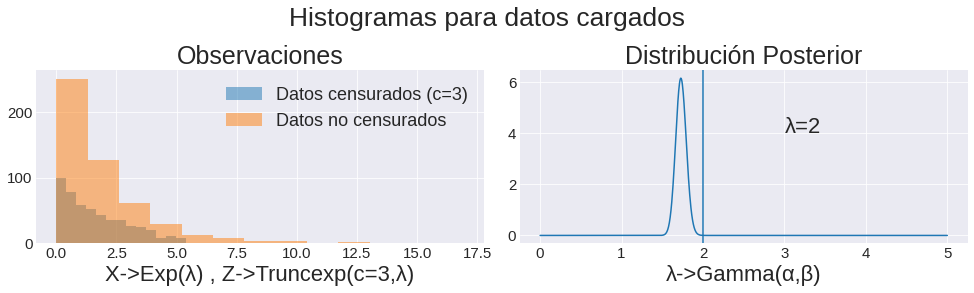

In [188]:
Lambda=2
n=500 # Nueva cantidad de datos
c=2.7 # Nueva Censura
X = expon.rvs(loc = 0, scale = Lambda, size=n)
DCensurada=np.minimum(X,c)
Z = truncexpon.rvs(c, loc = 0, scale = Lambda, size=n)
alpha=30
beta=3
alphapost=(n-CDC(X,DCensurada))+alpha
betapost= c*CDC(X,DCensurada) + beta + SumaNoCensurados(DCensurada,c)
Ga=gamma.pdf(x,loc=0,a=betapost,scale=1/alphapost)
x=np.linspace (0, 25, 200) 
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.hist(Z, bins=13, alpha=0.5, label="Datos censurados (c=3)")
plt.hist(X, bins=13, alpha=0.5, label="Datos no censurados")
plt.legend()
plt.xlabel('X->Exp(λ) , Z->Truncexp(c=3,λ)')
plt.title(r'Observaciones')
plt.subplot(1, 2, 2)
x=np.linspace(0,5, num=1000)
plt.plot(x,Ga)
plt.axvline(x=Lambda)
plt.text(3, 4, 'λ=2')
plt.xlabel('λ->Gamma(α,β)')
plt.title(r'Distribución Posterior')
plt.suptitle('Histogramas para datos cargados', y=1.05)
plt.tight_layout()

#Conclusión  
Con estas figuras podemos observar como la censura, al disminuir, afecta negativamente a la estimación del parametro $\lambda$ pues se censuran mayor cantidad de datos. Esto podemos verlo en el gráfico de la distribución posterior al ver que la densidad de la distribución gamma se aleja de la vertical $x=\lambda$. También podemos apreciar que, con menor cantidad de datos (n), es más difícil estimar de buena forma nuestro parámetro (esto se ve reflejado en la segunda modificación).

#P4

### Se trabajará con el modelo exponencial de parámetro $\theta$ junto con una distribución a priori gamma, es decir, $X_i \sim \theta e^{-\theta x}$ y $\theta \sim \frac{\beta ^\alpha}{\Gamma (\alpha)}\theta ^{\alpha -1}e^{-\beta \theta} $  
Tal prior sabemos que es conjugado por la P1.

parámetro theta= 5
alpha,beta= 10 , 34


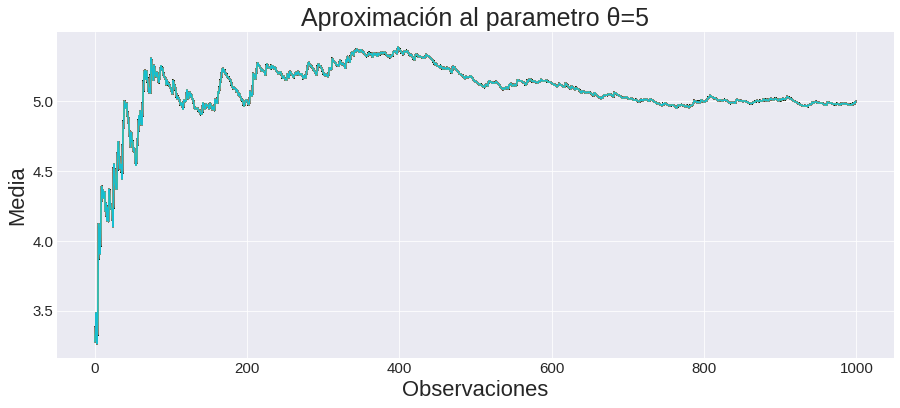

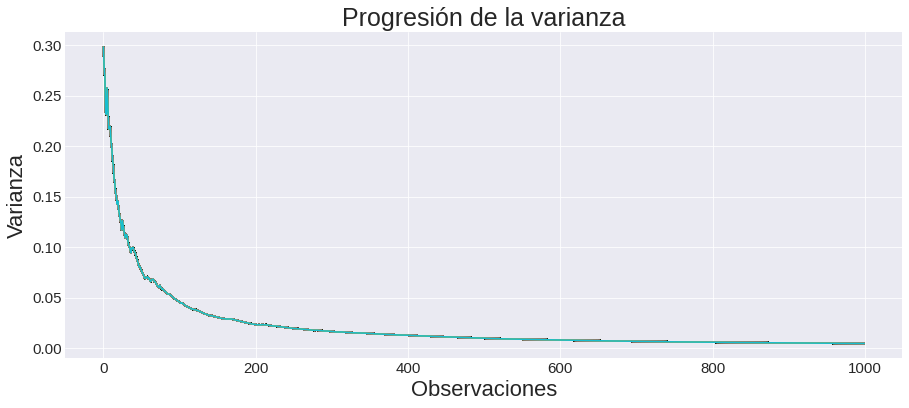

In [189]:
theta=5
print("parámetro theta=",theta)
n=1000
X = expon.rvs(loc = 0, scale = theta, size=n)
alpha=random.randint(1,50)
beta=random.randint(1,50)
print("alpha,beta=",alpha,",",beta)
x=np.linspace (0, 100, 1000) 
G = gamma.pdf(x,loc=0, a=alpha, scale=1/beta)
LP=[]
#LP es la lista de distribuciones posteriores donde cada coordenada es (alpha,beta)
for i in range(1,n+1):
  valor=(i+alpha, aux(X,i-1)+beta)
  LP.append(valor)
#Creación lista de promedios
Media=[]
LargoLP=len(LP)
for i in range(0,LargoLP):
  Media.append(LP[i][1]/LP[i][0])
#Creación lista de varianzas
Varianza=[]
for i in range(0,LargoLP):
  Varianza.append(LP[i][1]/(LP[i][0])**2)
#Gráficas de media y varianza
ejex=list(range(0, 1000))
for i in range(1,n+1):
  plt.plot(ejex,Media)
plt.title("Aproximación al parametro θ=5") 
plt.xlabel("Observaciones") 
plt.ylabel("Media")    
plt.show()
for i in range(1,n+1):
  plt.plot(ejex,Varianza)
plt.title("Progresión de la varianza") 
plt.xlabel("Observaciones") 
plt.ylabel("Varianza")  
plt.show()

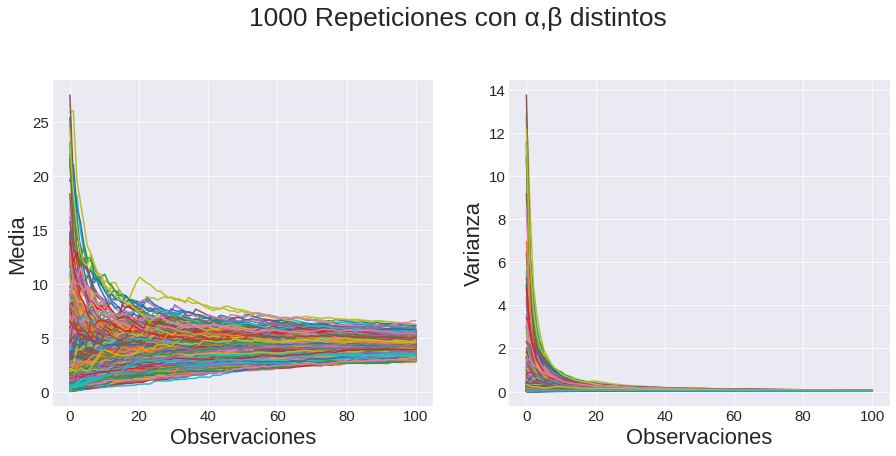

In [190]:
theta=5
n=100
ejex=np.linspace(0,100, num=100)
ejex2= np.linspace(0,100, num=100)
def Parametros(i):
    alpha=random.randint(1,50)
    beta=random.randint(1,50)
    return [alpha,beta]
Gmedia=plt.subplot(1, 2, 1)
plt.xlabel("Observaciones") 
plt.ylabel("Media")
Gvar=plt.subplot(1, 2, 2)
for i in range(1,1001):
  X = expon.rvs(loc = 0, scale = theta, size=n)
  alpharandom=Parametros(i)[0]
  betarandom=Parametros(i)[1]
  Lista=[]
  Media=[]
  Varianza=[]
  for i in range(1,n+1):
    valor=(i+alpharandom, aux(X,i-1)+betarandom)
    Lista.append(valor)
    Media.append(Lista[i-1][1]/Lista[i-1][0])
    Varianza.append(Lista[i-1][1]/((Lista[i-1][0])**2))
    if len(Media)==len(X):
      Gmedia.plot(ejex,Media)
      if len(Varianza)==len(X):
        Gvar.plot(ejex2,Varianza)

plt.xlabel("Observaciones") 
plt.ylabel("Varianza")  
plt.suptitle('1000 Repeticiones con α,β distintos', y=1.05)
plt.show()

#Conclusión  
Se puede observar claramente, que al igual que el primer ejemplo, la media de los valores sigue tendiendo a su valos real ($\theta =5$ en este caso) y que al haber mas observaciones esta tendencia se hace mas clara, y así, la varianza también tiende a 0. Observamos también que el gráfico actúa como un modelo exponencial al ser el prior Gamma conjugado a este.